In [2]:
import plumed
import matplotlib.pyplot as plt
import mdtraj as md
import numpy

In [34]:
# import COLVAR file as pandas dataset
# set the right path to the COLVAR file
data=plumed.read_as_pandas("COLVAR")
# print pandas dataset
data

<ipython-input-34-ee0a61664abe>:3: UserWarning: cannot load PLUMED instance, conversions will not be available
  data=plumed.read_as_pandas("COLVAR")


,time,phi,psi
0,0.0,0.972841,1.874093
1,1.0,-2.141033,2.401183
2,2.0,-2.359835,-3.110752
3,3.0,-1.045449,3.139729
4,4.0,-1.568748,2.531626
...,...,...,...
99996,99996.0,-3.139886,-2.258322
99997,99997.0,-2.292363,3.015810
99998,99998.0,-2.724571,2.614731
99999,99999.0,2.945393,-2.049820


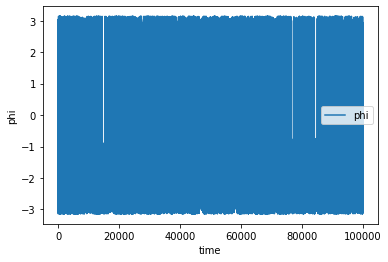

In [32]:
data.time,data.phi=data.time,data.phi
plt.plot(data.time,data.phi,label="phi")
# x-y axis labels
plt.xlabel("time")
plt.ylabel("phi")
plt.legend()

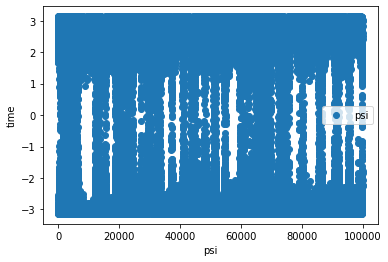

In [38]:
data.time,data.psi=data.time,data.psi
plt.scatter (data.time,data.psi, label="psi")
# x-y axis labels
plt.xlabel("psi")

plt.ylabel("time")
plt.legend()

In [36]:
traj = md.load_xtc('traj_comp.xtc', top='confout.gro')
a,phi = md.compute_phi(traj)
b,psi = md.compute_psi(traj)

In [37]:
print(psi)

[[2.877952 ]
 [2.4328592]
 [2.672416 ]
 ...
 [2.764508 ]
 [2.8560367]
 [2.5861402]]


In [9]:
phi_standard=numpy.std(phi)

psi_standard=numpy.std(psi)

NameError: name 'phi' is not defined

TypeError: ufunc 'sqrt' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

<Figure size 864x288 with 0 Axes>

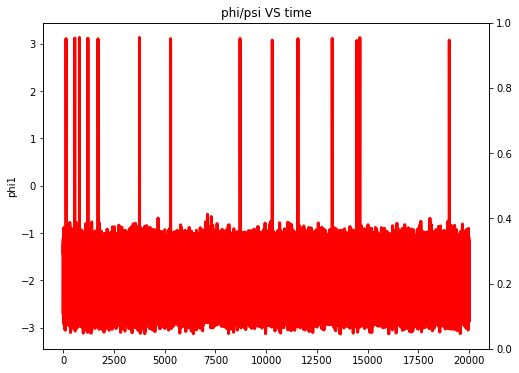

In [40]:
fig = plt.figure(figsize=(12,4)) 
x_a = traj.time
y_a1 =phi1
y_a2 =data.phi
fig = plt.figure(num=3,figsize=(8,6),facecolor='w')
ax1 = fig.add_subplot(111)
ax1.plot(x_a, y_a1,'r',linewidth=3,linestyle='solid')
ax1.set_ylabel('phi1')
ax1.set_title("phi/psi VS time")
ax2 = ax1.twinx()  # this is the important function
ax2.scatter (x_a, y_a2, 'b',linewidth=3,linestyle='dashed')#supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
#ax2.set_xlim([0, np.e])
ax2.set_ylabel('psi')
ax1.set_xlabel('time')
plt.show()